# Explore Data Scaling Inputs in Elastic Net 

- For reptile specific model
- Compare generated elastic net predictions from glmnet vs. scikit-learn
- In glmnet, `standardize=False` and default parameters are used unless specified otherwise

Summary:
- For `standardize` data, `fit_intercept=True/False` in elastic net seems to yield same predictions.
- For `normalize` data, use `fit_intercept=False` in elastic net. The predictions for all species will be the same if `fit_intercept=True`.
- When no scaling is applied to the input data, the predictions between glmnet and scikit-learn are almost the same (see Trial [1](#Trial-1)).
- Regardless of whether the `Value in File` uses raw or scale values, the predictions between those are similar (see Trial [2](#Trial-2) vs. [3](#Trial-3)-[5](#Trial-5) for standardize, Trial [7](#Trial-7) vs. [8](#Trial-8)-[10](#Trial-10) for normalize).
- Comparing scaled and unscaled predictions, (speculation) there appear to be floating point problem between R and Python when rescaling the values, possibly from the log/exp scale (see Trial [2](#Trial-2)-[5](#Trial-5) vs. [6](#Trial-6) for standardize, Trial [8](#Trial-8)-[10](#Trial-10) vs. [11](#Trial-11) for normalize).
- With `standardize=True` in glmnet model and standardize X+y, seems similar to manual scaling but smaller difference for Sternotherus odoratus and Caiman crocodilus and the rest were slightly larger offsets (see Trial [12](#Trial-12) vs. [2](#Trial-2)).

| Trial # | Scale $X$ | Scale $y$ | Value in File | Add in Code |
| :---: | :---: | :---: | :---: | :--- |
| [1](#Trial-1) | None | None | raw X+y | None | None |
| [2](#Trial-2) | standardized | standardized | raw X+y | scale X, scale y |
| [3](#Trial-3) | standardized | standardized | scale X | w/o scale X, scale y |
| [4](#Trial-4) | standardized | standardized | scale y, data from Trial2 | scale X, w/o scale y |
| [5](#Trial-5) | standardized | standardized | scale X+y | data from Trial3 | w/o scale X, w/o scale y |
| [6](#Trial-6) | <td colspan=4> Results for unscaled predictions for Trial2-5|
| [7](#Trial-7) | normalize | normalize | raw X+y | scale X, scale y, `fit_intercept=False` |
| [8](#Trial-8) | normalize | normalize | scale X | w/o scale X, scale y, `fit_intercept=False` |
| [9](#Trial-9) | normalize | normalize | scale y, data from Trial7 | scale X, w/o scale y, `fit_intercept=False` |
| [10](#Trial-10) | normalize | normalize | scale X+y | data from Trial8 | w/o scale X, w/o scale y, `fit_intercept=False` |
| [11](#Trial-11) | <td colspan=4> Results for unscaled predictions for Trial7-10|
| [12](#Trial-12) | standardized | standardized | raw X+y | `standardize=True` in glmnet, scale X, scale y |
| [13](#Trial-13) | None | standardized | raw X+y | `standardize=True` in glmnet, w/o scale X, scale y |


## Trial 1

PARTITION # 1
PARTITION # 2
PARTITION # 3
PARTITION # 4
PARTITION # 5
PARTITION # 6
PARTITION # 7
PARTITION # 8
PARTITION # 9
PARTITION # 10


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


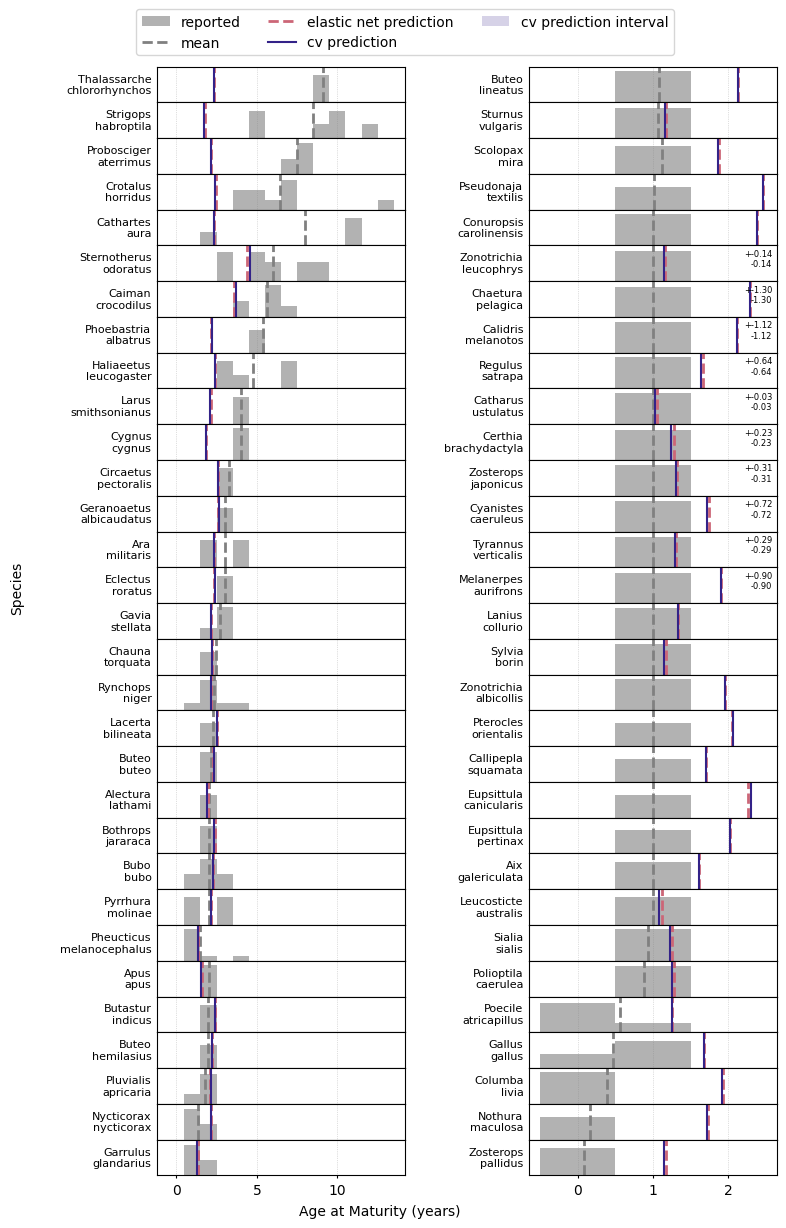

In [4]:
data_reported_filename = '00.02_age_mat_reported.csv'
config_filepath = '../config/config_reptilesgallus.yaml'
config_pred_filepath = '../config/config_pred_reptilesgallus.yaml'

import sys
sys.path.append("..")
from pathlib import Path
import pandas as pd
import life_pi.lib.generate_pi as generate_pi
import life_pi.lib.plot_utils as plot_utils
from life_pi.lib.get_config import get_config
cfg = get_config(config_filepath)
data_dir = Path('..', cfg['data_dir'])
output_dir = Path('..', cfg['output_dir'])
plot_dir = Path('../figures', output_dir.stem)
plot_dir.mkdir(parents=True, exist_ok=True)
print(f"Confidence level >> {(1-cfg['alpha'])*100}%")

# Load reported lifespan data
df_datareport = pd.read_csv(Path(data_dir, data_reported_filename))
df_datareport['mean_'+cfg['y_labelname']] = df_datareport.groupby('species')['age_mat'].transform('mean') # Add mean_age_mat
df_datareport = df_datareport.groupby('species', group_keys=True).apply(lambda x: x)

strategy = 'cv'
df_data_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=0, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_data_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=False)

## Trial 2

Load config file >> ../config/config_reptilesgallus.yaml
Confidence level >> 90.0%
PARTITION # 1
PARTITION # 3
PARTITION # 5
PARTITION # 6
PARTITION # 7


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


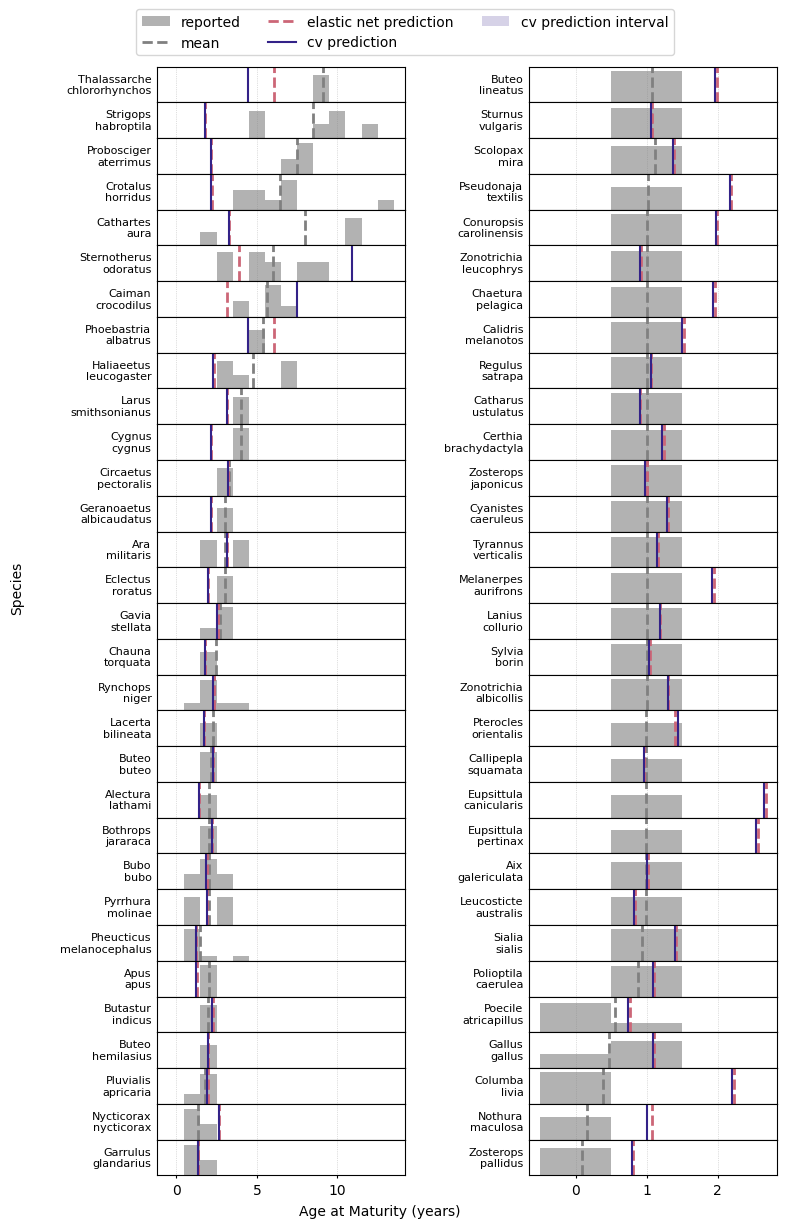

In [1]:
data_reported_filename = '00.02_age_mat_reported.csv'
config_filepath = '../config/config_reptilesgallus.yaml'
config_pred_filepath = '../config/config_pred_reptilesgallus.yaml'

import sys
sys.path.append("..")
from pathlib import Path
import pandas as pd
import life_pi.lib.generate_pi as generate_pi
import life_pi.lib.plot_utils as plot_utils
from life_pi.lib.get_config import get_config
cfg = get_config(config_filepath)
data_dir = Path('..', cfg['data_dir'])
output_dir = Path('..', cfg['output_dir'])
plot_dir = Path('../figures', output_dir.stem)
plot_dir.mkdir(parents=True, exist_ok=True)
print(f"Confidence level >> {(1-cfg['alpha'])*100}%")

# Load reported lifespan data
df_datareport = pd.read_csv(Path(data_dir, data_reported_filename))
df_datareport['mean_'+cfg['y_labelname']] = df_datareport.groupby('species')['age_mat'].transform('mean') # Add mean_age_mat
df_datareport = df_datareport.groupby('species', group_keys=True).apply(lambda x: x)

strategy = 'cv'
df_data_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=0, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_data_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=False)

## Trial 3

Load config file >> ../config/config_reptilesgallus.yaml
Confidence level >> 90.0%
PARTITION # 1
PARTITION # 3
PARTITION # 5
PARTITION # 6
PARTITION # 7


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


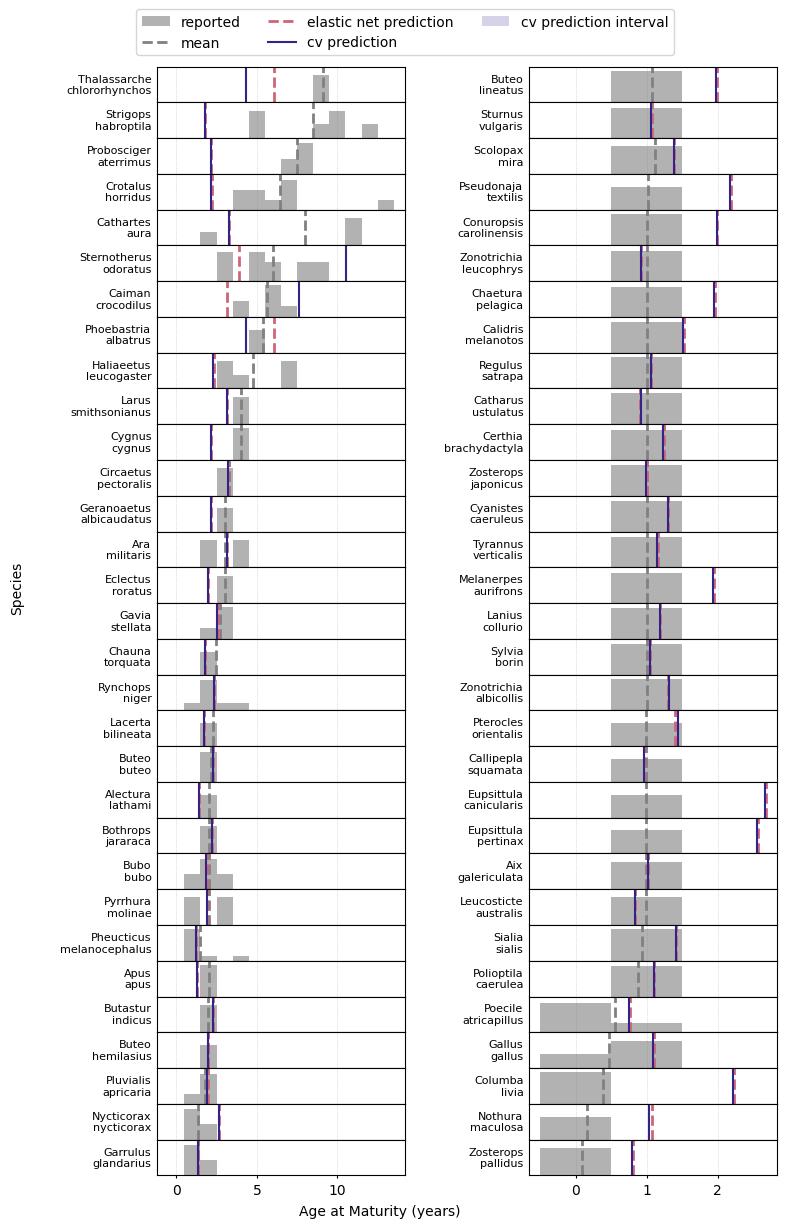

In [1]:
data_reported_filename = '00.02_age_mat_reported.csv'
config_filepath = '../config/config_reptilesgallus.yaml'
config_pred_filepath = '../config/config_pred_reptilesgallus.yaml'

import sys
sys.path.append("..")
from pathlib import Path
import pandas as pd
import life_pi.lib.generate_pi as generate_pi
import life_pi.lib.plot_utils as plot_utils
from life_pi.lib.get_config import get_config
cfg = get_config(config_filepath)
data_dir = Path('..', cfg['data_dir'])
output_dir = Path('..', cfg['output_dir'])
plot_dir = Path('../figures', output_dir.stem)
plot_dir.mkdir(parents=True, exist_ok=True)
print(f"Confidence level >> {(1-cfg['alpha'])*100}%")

# Load reported lifespan data
df_datareport = pd.read_csv(Path(data_dir, data_reported_filename))
df_datareport['mean_'+cfg['y_labelname']] = df_datareport.groupby('species')['age_mat'].transform('mean') # Add mean_age_mat
df_datareport = df_datareport.groupby('species', group_keys=True).apply(lambda x: x)

strategy = 'cv'
df_data_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=0, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_data_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=False)

## Trial 4

Load config file >> ../config/config_reptilesgallus.yaml
Confidence level >> 90.0%
PARTITION # 1
PARTITION # 3
PARTITION # 5
PARTITION # 6
PARTITION # 7


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


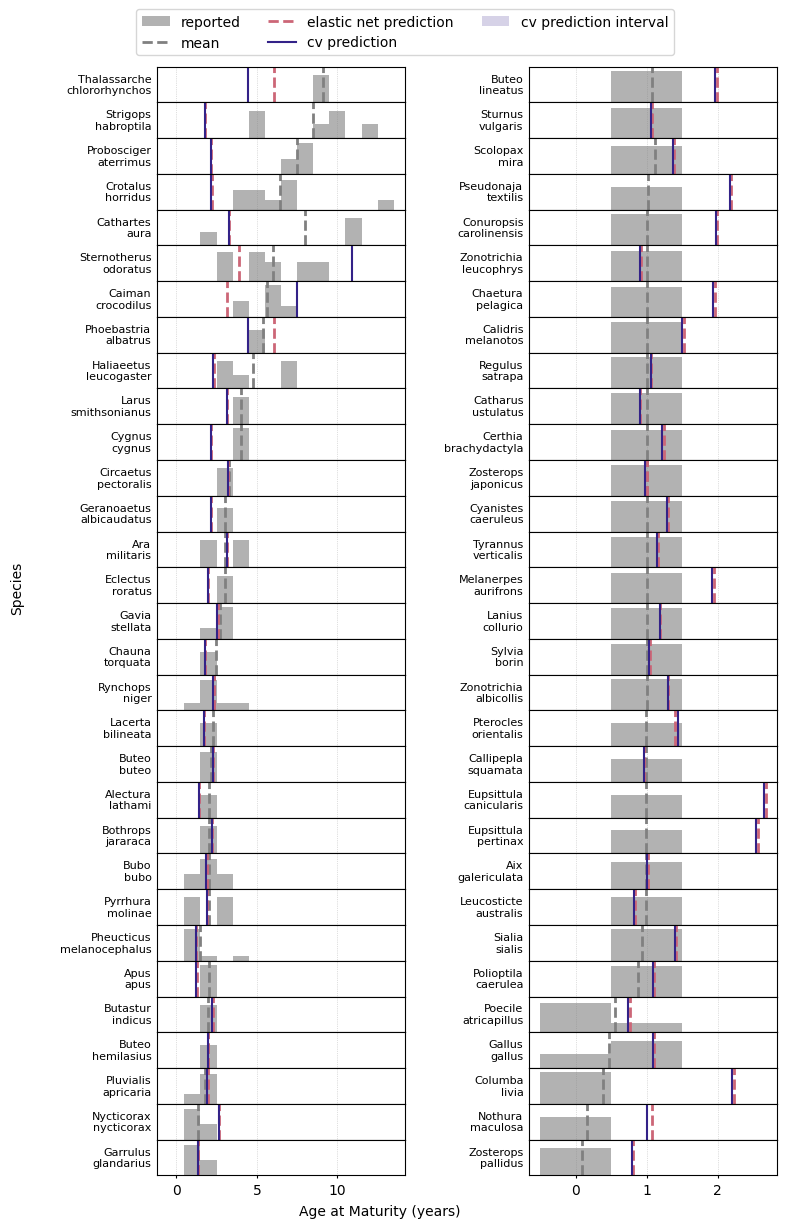

In [1]:
data_reported_filename = '00.02_age_mat_reported.csv'
config_filepath = '../config/config_reptilesgallus.yaml'
config_pred_filepath = '../config/config_pred_reptilesgallus.yaml'

import sys
sys.path.append("..")
from pathlib import Path
import pandas as pd
import life_pi.lib.generate_pi as generate_pi
import life_pi.lib.plot_utils as plot_utils
from life_pi.lib.get_config import get_config
cfg = get_config(config_filepath)
data_dir = Path('..', cfg['data_dir'])
output_dir = Path('..', cfg['output_dir'])
plot_dir = Path('../figures', output_dir.stem)
plot_dir.mkdir(parents=True, exist_ok=True)
print(f"Confidence level >> {(1-cfg['alpha'])*100}%")

# Load reported lifespan data
df_datareport = pd.read_csv(Path(data_dir, data_reported_filename))
df_datareport['mean_'+cfg['y_labelname']] = df_datareport.groupby('species')['age_mat'].transform('mean') # Add mean_age_mat
df_datareport = df_datareport.groupby('species', group_keys=True).apply(lambda x: x)

strategy = 'cv'
df_data_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=0, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_data_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=False)

## Trial 5

Load config file >> ../config/config_reptilesgallus.yaml
Confidence level >> 90.0%
PARTITION # 1
PARTITION # 3
PARTITION # 5
PARTITION # 6
PARTITION # 7


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


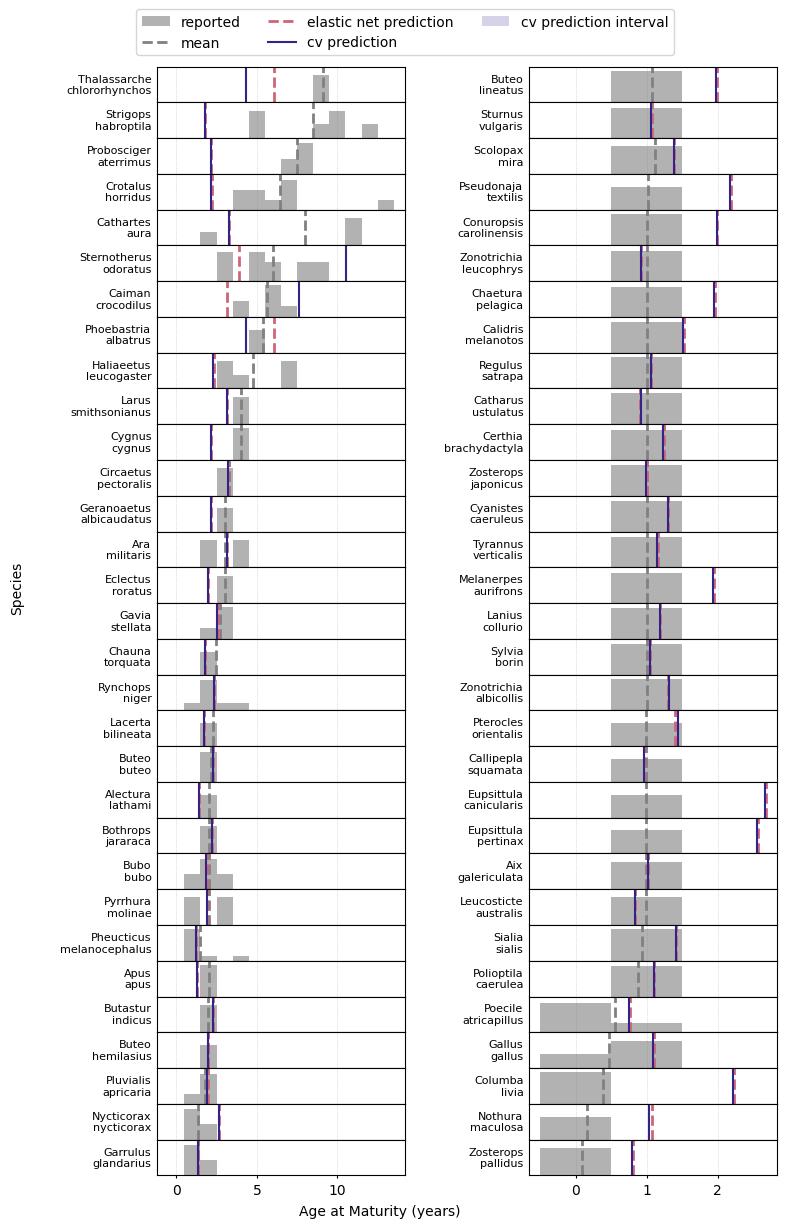

In [1]:
data_reported_filename = '00.02_age_mat_reported.csv'
config_filepath = '../config/config_reptilesgallus.yaml'
config_pred_filepath = '../config/config_pred_reptilesgallus.yaml'

import sys
sys.path.append("..")
from pathlib import Path
import pandas as pd
import life_pi.lib.generate_pi as generate_pi
import life_pi.lib.plot_utils as plot_utils
from life_pi.lib.get_config import get_config
cfg = get_config(config_filepath)
data_dir = Path('..', cfg['data_dir'])
output_dir = Path('..', cfg['output_dir'])
plot_dir = Path('../figures', output_dir.stem)
plot_dir.mkdir(parents=True, exist_ok=True)
print(f"Confidence level >> {(1-cfg['alpha'])*100}%")

# Load reported lifespan data
df_datareport = pd.read_csv(Path(data_dir, data_reported_filename))
df_datareport['mean_'+cfg['y_labelname']] = df_datareport.groupby('species')['age_mat'].transform('mean') # Add mean_age_mat
df_datareport = df_datareport.groupby('species', group_keys=True).apply(lambda x: x)

strategy = 'cv'
df_data_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=0, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_data_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=False)

## Trial 6

Load config file >> ../config/config_reptilesgallus.yaml
Confidence level >> 90.0%
PARTITION # 1
PARTITION # 3
PARTITION # 5
PARTITION # 6
PARTITION # 7


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


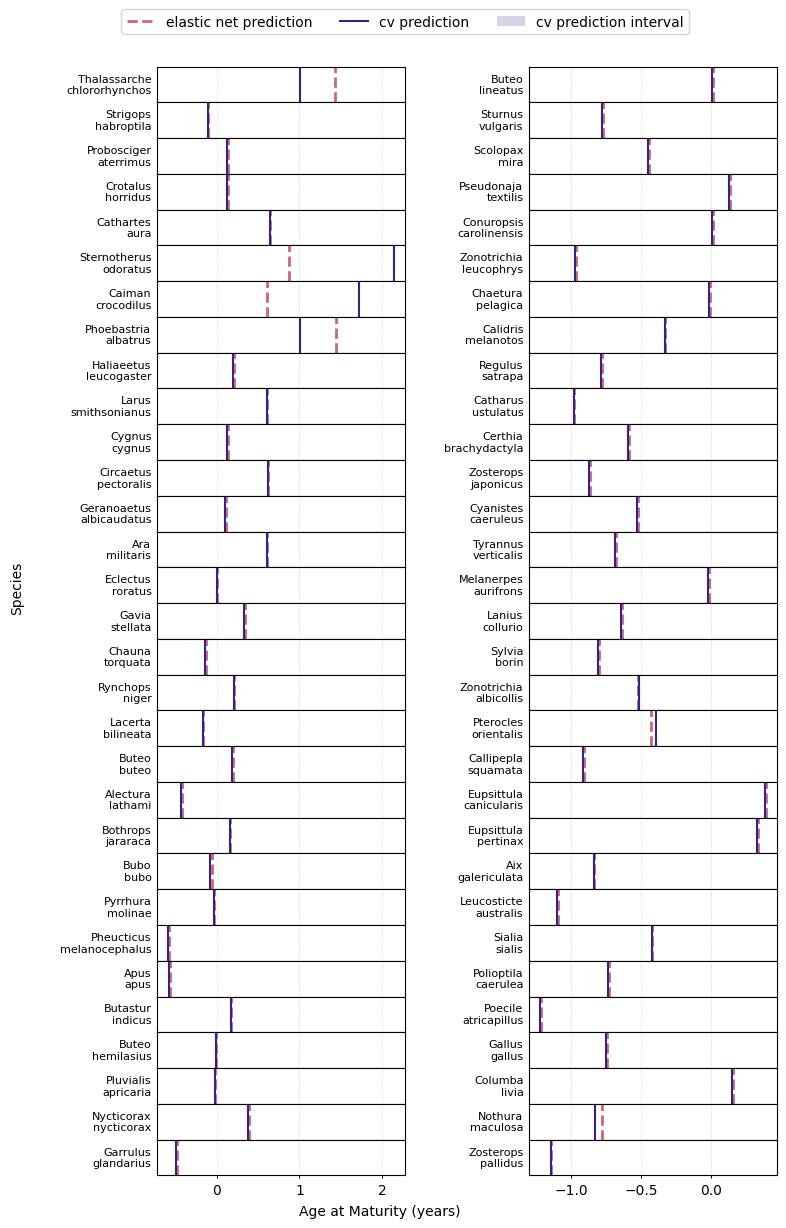

In [1]:
data_reported_filename = '00.02_age_mat_reported.csv'
config_filepath = '../config/config_reptilesgallus.yaml'
config_pred_filepath = '../config/config_pred_reptilesgallus.yaml'

import sys
sys.path.append("..")
from pathlib import Path
import pandas as pd
import life_pi.lib.generate_pi as generate_pi
import life_pi.lib.plot_utils as plot_utils
from life_pi.lib.get_config import get_config
cfg = get_config(config_filepath)
data_dir = Path('..', cfg['data_dir'])
output_dir = Path('..', cfg['output_dir'])
plot_dir = Path('../figures', output_dir.stem)
plot_dir.mkdir(parents=True, exist_ok=True)
print(f"Confidence level >> {(1-cfg['alpha'])*100}%")

# Load reported lifespan data
df_datareport = pd.read_csv(Path(data_dir, data_reported_filename))
df_datareport['mean_'+cfg['y_labelname']] = df_datareport.groupby('species')['age_mat'].transform('mean') # Add mean_age_mat
df_datareport = df_datareport.groupby('species', group_keys=True).apply(lambda x: x)

strategy = 'cv'
df_data_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=0, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_data_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=False)

## Trial 7

Load config file >> ../config/config_reptilesgallus.yaml
Confidence level >> 90.0%
PARTITION # 1
PARTITION # 2
PARTITION # 3
PARTITION # 5
PARTITION # 6
PARTITION # 7
PARTITION # 9


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


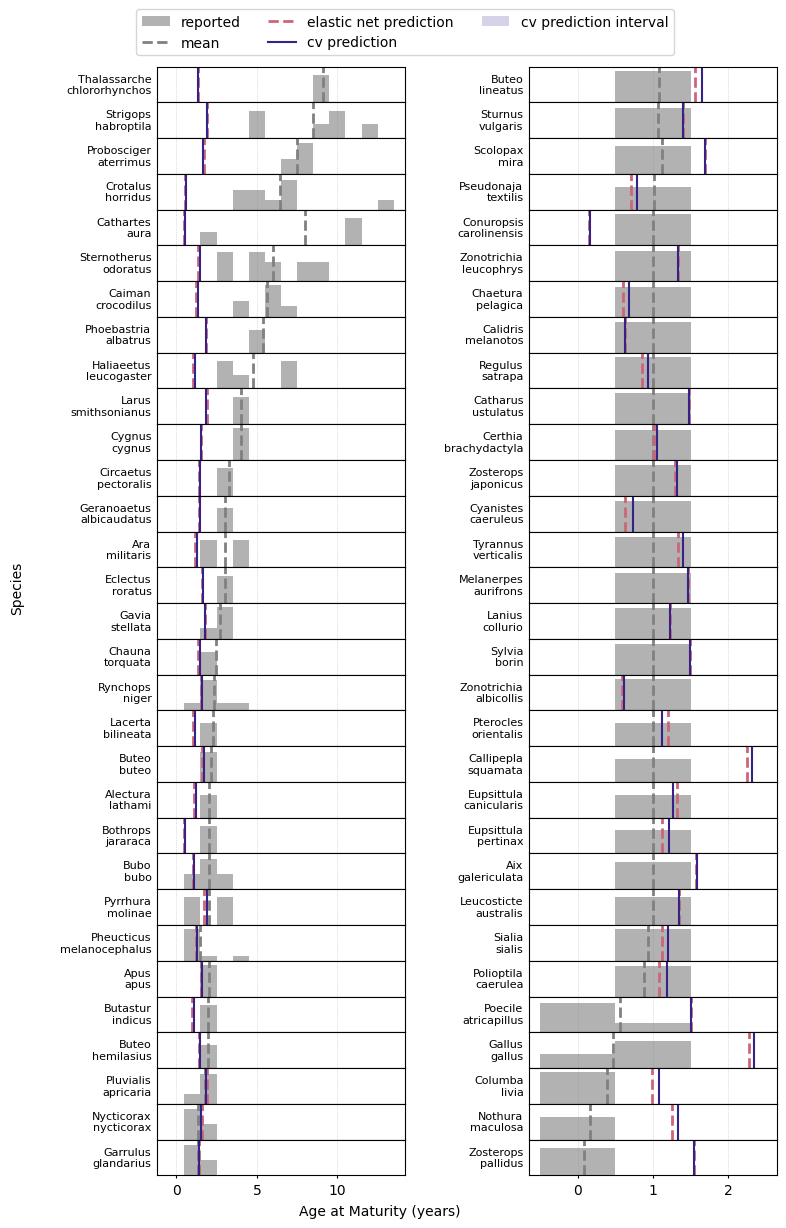

In [1]:
data_reported_filename = '00.02_age_mat_reported.csv'
config_filepath = '../config/config_reptilesgallus.yaml'
config_pred_filepath = '../config/config_pred_reptilesgallus.yaml'

import sys
sys.path.append("..")
from pathlib import Path
import pandas as pd
import life_pi.lib.generate_pi as generate_pi
import life_pi.lib.plot_utils as plot_utils
from life_pi.lib.get_config import get_config
cfg = get_config(config_filepath)
data_dir = Path('..', cfg['data_dir'])
output_dir = Path('..', cfg['output_dir'])
plot_dir = Path('../figures', output_dir.stem)
plot_dir.mkdir(parents=True, exist_ok=True)
print(f"Confidence level >> {(1-cfg['alpha'])*100}%")

# Load reported lifespan data
df_datareport = pd.read_csv(Path(data_dir, data_reported_filename))
df_datareport['mean_'+cfg['y_labelname']] = df_datareport.groupby('species')['age_mat'].transform('mean') # Add mean_age_mat
df_datareport = df_datareport.groupby('species', group_keys=True).apply(lambda x: x)

strategy = 'cv'
df_data_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=0, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_data_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=False)

## Trial 8

Load config file >> ../config/config_reptilesgallus.yaml
Confidence level >> 90.0%
PARTITION # 1
PARTITION # 2
PARTITION # 3
PARTITION # 5
PARTITION # 6
PARTITION # 7
PARTITION # 9


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


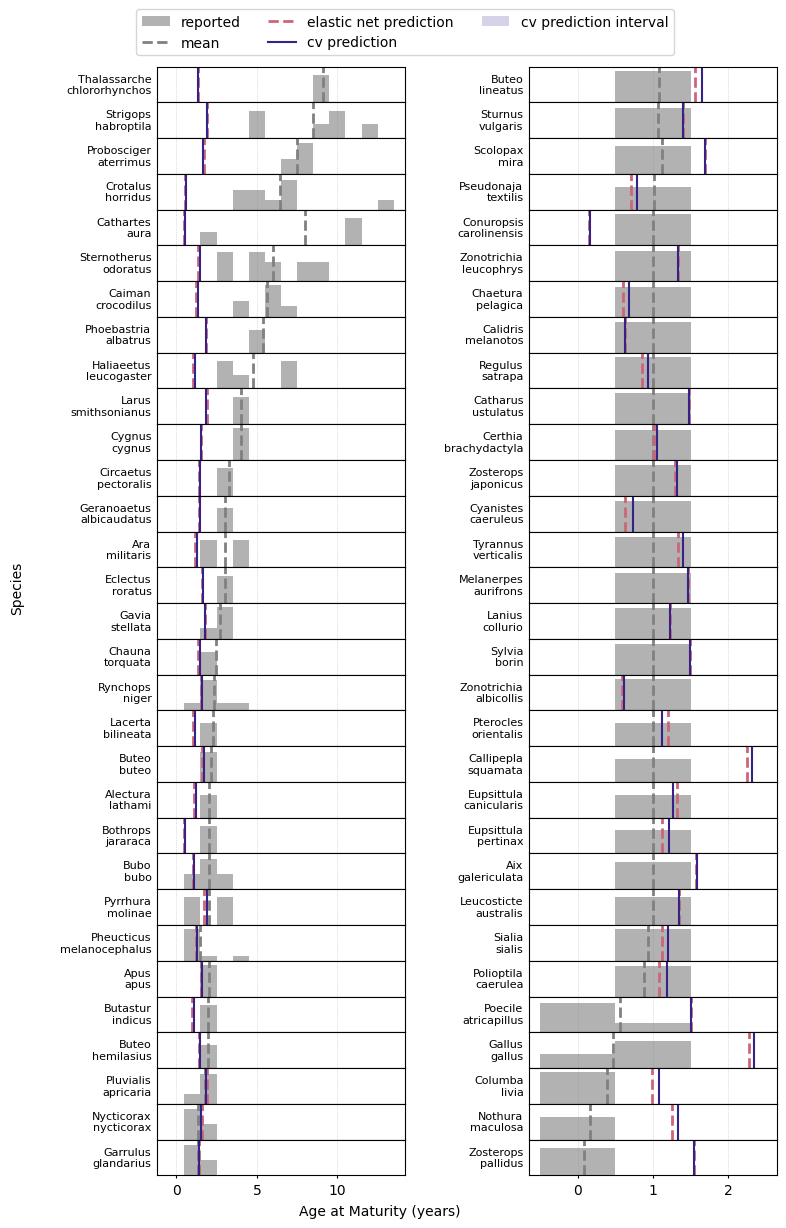

In [1]:
data_reported_filename = '00.02_age_mat_reported.csv'
config_filepath = '../config/config_reptilesgallus.yaml'
config_pred_filepath = '../config/config_pred_reptilesgallus.yaml'

import sys
sys.path.append("..")
from pathlib import Path
import pandas as pd
import life_pi.lib.generate_pi as generate_pi
import life_pi.lib.plot_utils as plot_utils
from life_pi.lib.get_config import get_config
cfg = get_config(config_filepath)
data_dir = Path('..', cfg['data_dir'])
output_dir = Path('..', cfg['output_dir'])
plot_dir = Path('../figures', output_dir.stem)
plot_dir.mkdir(parents=True, exist_ok=True)
print(f"Confidence level >> {(1-cfg['alpha'])*100}%")

# Load reported lifespan data
df_datareport = pd.read_csv(Path(data_dir, data_reported_filename))
df_datareport['mean_'+cfg['y_labelname']] = df_datareport.groupby('species')['age_mat'].transform('mean') # Add mean_age_mat
df_datareport = df_datareport.groupby('species', group_keys=True).apply(lambda x: x)

strategy = 'cv'
df_data_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=0, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_data_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=False)

## Trial 9

Load config file >> ../config/config_reptilesgallus.yaml
Confidence level >> 90.0%
PARTITION # 1
PARTITION # 2
PARTITION # 3
PARTITION # 5
PARTITION # 6
PARTITION # 7
PARTITION # 9


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


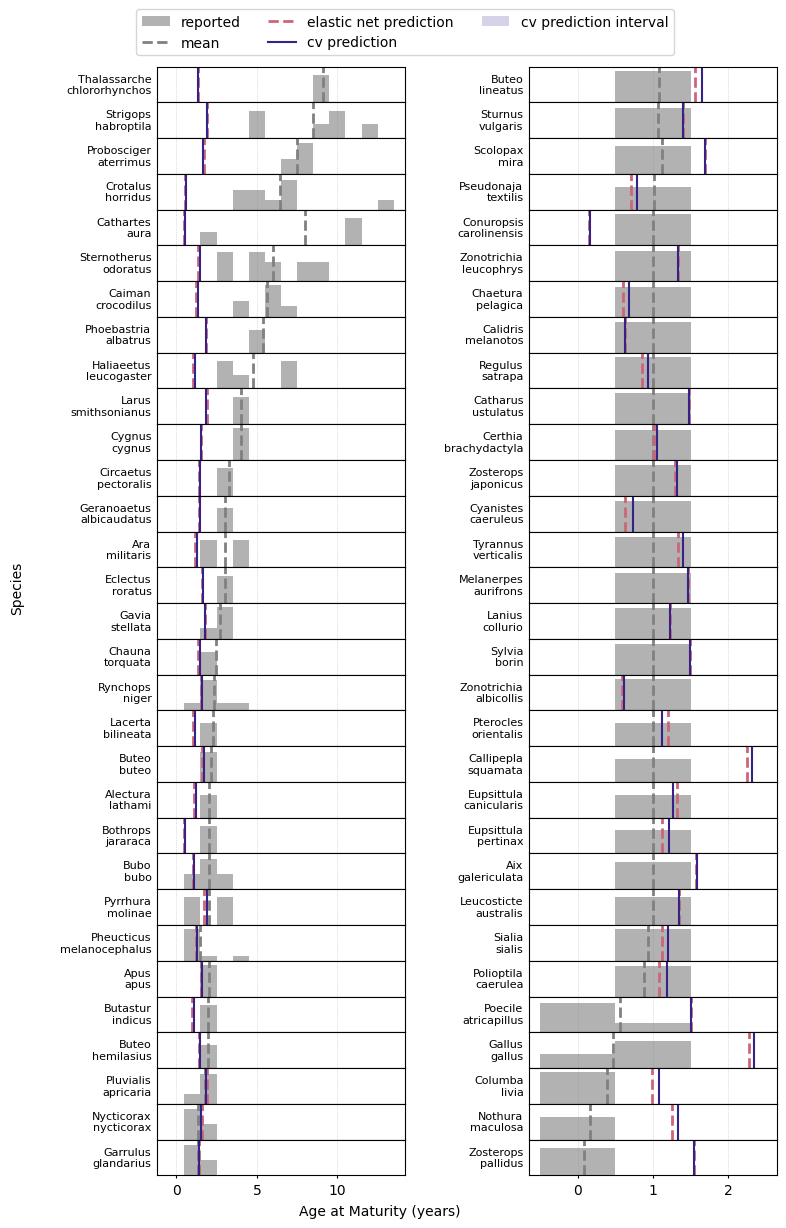

In [1]:
data_reported_filename = '00.02_age_mat_reported.csv'
config_filepath = '../config/config_reptilesgallus.yaml'
config_pred_filepath = '../config/config_pred_reptilesgallus.yaml'

import sys
sys.path.append("..")
from pathlib import Path
import pandas as pd
import life_pi.lib.generate_pi as generate_pi
import life_pi.lib.plot_utils as plot_utils
from life_pi.lib.get_config import get_config
cfg = get_config(config_filepath)
data_dir = Path('..', cfg['data_dir'])
output_dir = Path('..', cfg['output_dir'])
plot_dir = Path('../figures', output_dir.stem)
plot_dir.mkdir(parents=True, exist_ok=True)
print(f"Confidence level >> {(1-cfg['alpha'])*100}%")

# Load reported lifespan data
df_datareport = pd.read_csv(Path(data_dir, data_reported_filename))
df_datareport['mean_'+cfg['y_labelname']] = df_datareport.groupby('species')['age_mat'].transform('mean') # Add mean_age_mat
df_datareport = df_datareport.groupby('species', group_keys=True).apply(lambda x: x)

strategy = 'cv'
df_data_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=0, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_data_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=False)

## Trial 10

Load config file >> ../config/config_reptilesgallus.yaml
Confidence level >> 90.0%
PARTITION # 1
PARTITION # 2
PARTITION # 3
PARTITION # 5
PARTITION # 6
PARTITION # 7
PARTITION # 9


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


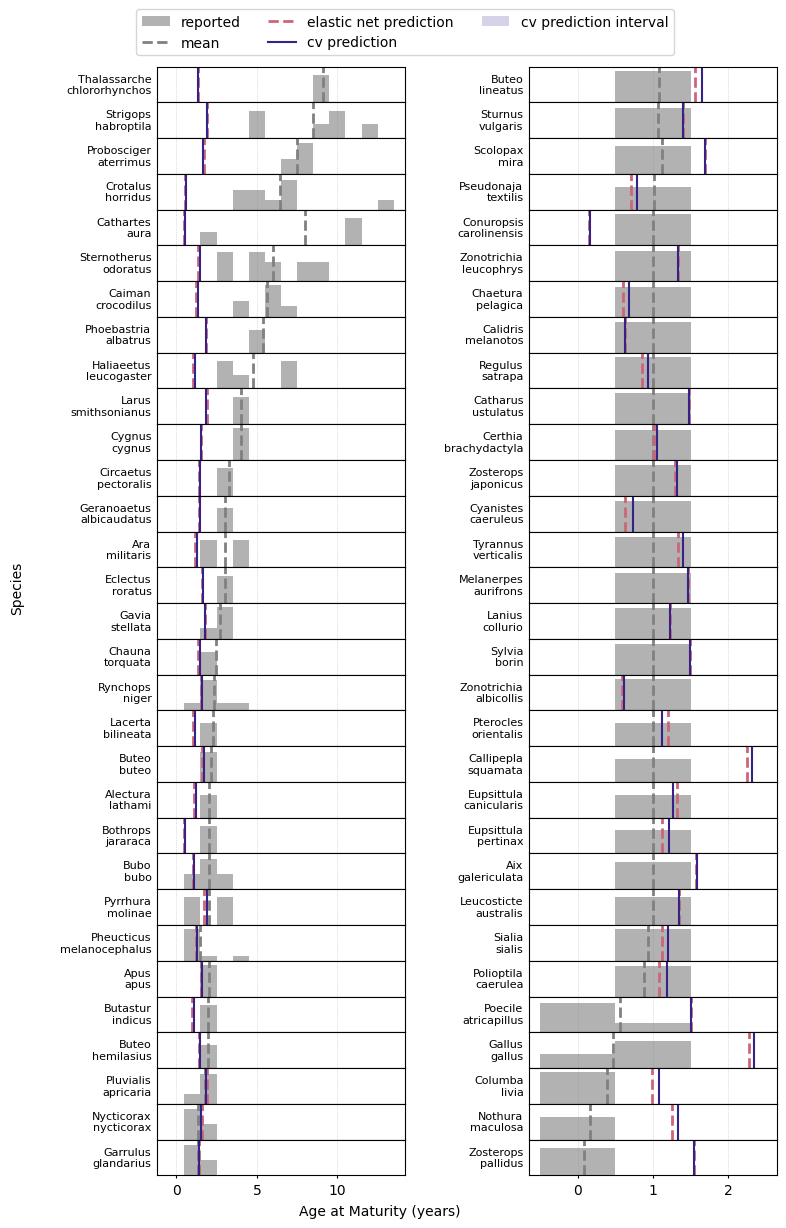

In [1]:
data_reported_filename = '00.02_age_mat_reported.csv'
config_filepath = '../config/config_reptilesgallus.yaml'
config_pred_filepath = '../config/config_pred_reptilesgallus.yaml'

import sys
sys.path.append("..")
from pathlib import Path
import pandas as pd
import life_pi.lib.generate_pi as generate_pi
import life_pi.lib.plot_utils as plot_utils
from life_pi.lib.get_config import get_config
cfg = get_config(config_filepath)
data_dir = Path('..', cfg['data_dir'])
output_dir = Path('..', cfg['output_dir'])
plot_dir = Path('../figures', output_dir.stem)
plot_dir.mkdir(parents=True, exist_ok=True)
print(f"Confidence level >> {(1-cfg['alpha'])*100}%")

# Load reported lifespan data
df_datareport = pd.read_csv(Path(data_dir, data_reported_filename))
df_datareport['mean_'+cfg['y_labelname']] = df_datareport.groupby('species')['age_mat'].transform('mean') # Add mean_age_mat
df_datareport = df_datareport.groupby('species', group_keys=True).apply(lambda x: x)

strategy = 'cv'
df_data_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=0, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_data_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=False)

## Trial 11

Load config file >> ../config/config_reptilesgallus.yaml
Confidence level >> 90.0%
PARTITION # 1
PARTITION # 2
PARTITION # 3
PARTITION # 5
PARTITION # 6
PARTITION # 7
PARTITION # 9


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


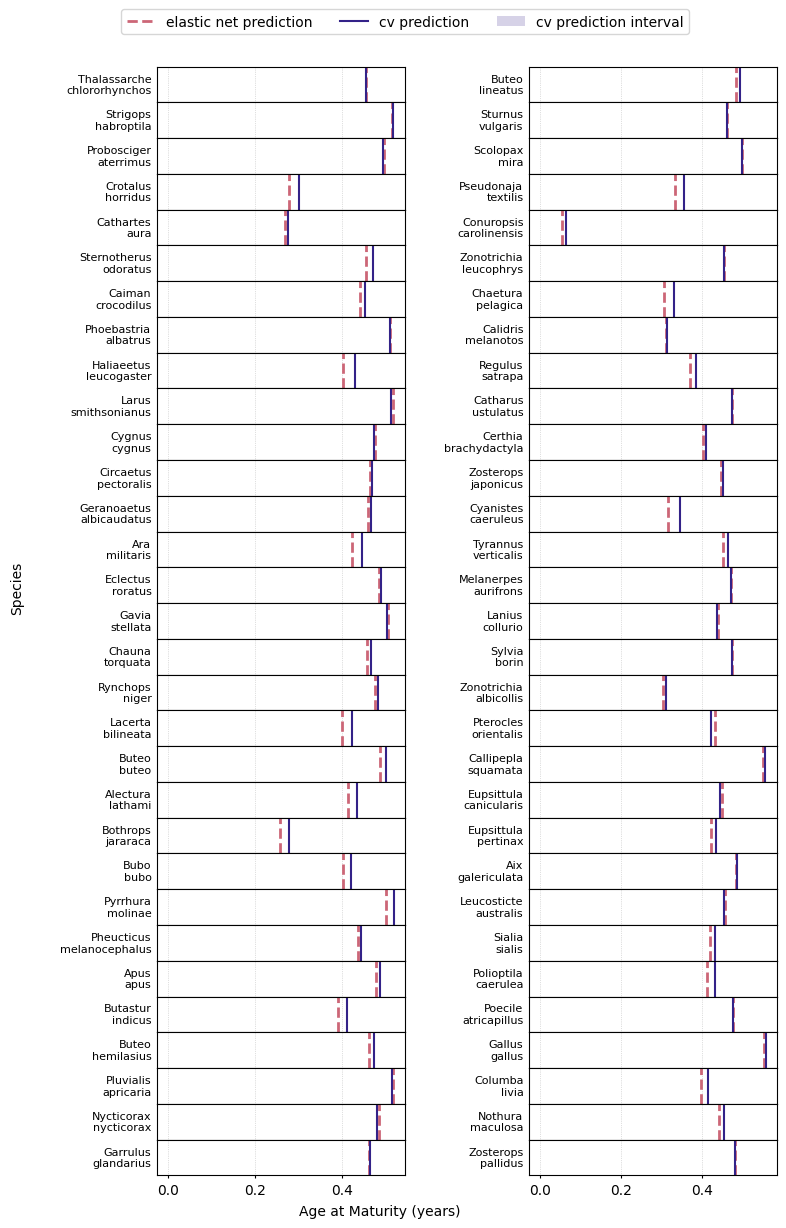

In [1]:
data_reported_filename = '00.02_age_mat_reported.csv'
config_filepath = '../config/config_reptilesgallus.yaml'
config_pred_filepath = '../config/config_pred_reptilesgallus.yaml'

import sys
sys.path.append("..")
from pathlib import Path
import pandas as pd
import life_pi.lib.generate_pi as generate_pi
import life_pi.lib.plot_utils as plot_utils
from life_pi.lib.get_config import get_config
cfg = get_config(config_filepath)
data_dir = Path('..', cfg['data_dir'])
output_dir = Path('..', cfg['output_dir'])
plot_dir = Path('../figures', output_dir.stem)
plot_dir.mkdir(parents=True, exist_ok=True)
print(f"Confidence level >> {(1-cfg['alpha'])*100}%")

# Load reported lifespan data
df_datareport = pd.read_csv(Path(data_dir, data_reported_filename))
df_datareport['mean_'+cfg['y_labelname']] = df_datareport.groupby('species')['age_mat'].transform('mean') # Add mean_age_mat
df_datareport = df_datareport.groupby('species', group_keys=True).apply(lambda x: x)

strategy = 'cv'
df_data_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=0, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_data_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=False)

## Trial 12

Load config file >> ../config/config_reptilesgallus.yaml
Confidence level >> 90.0%
PARTITION # 1
PARTITION # 2
PARTITION # 3
PARTITION # 4
PARTITION # 5
PARTITION # 6
PARTITION # 7
PARTITION # 8
PARTITION # 9
PARTITION # 10


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


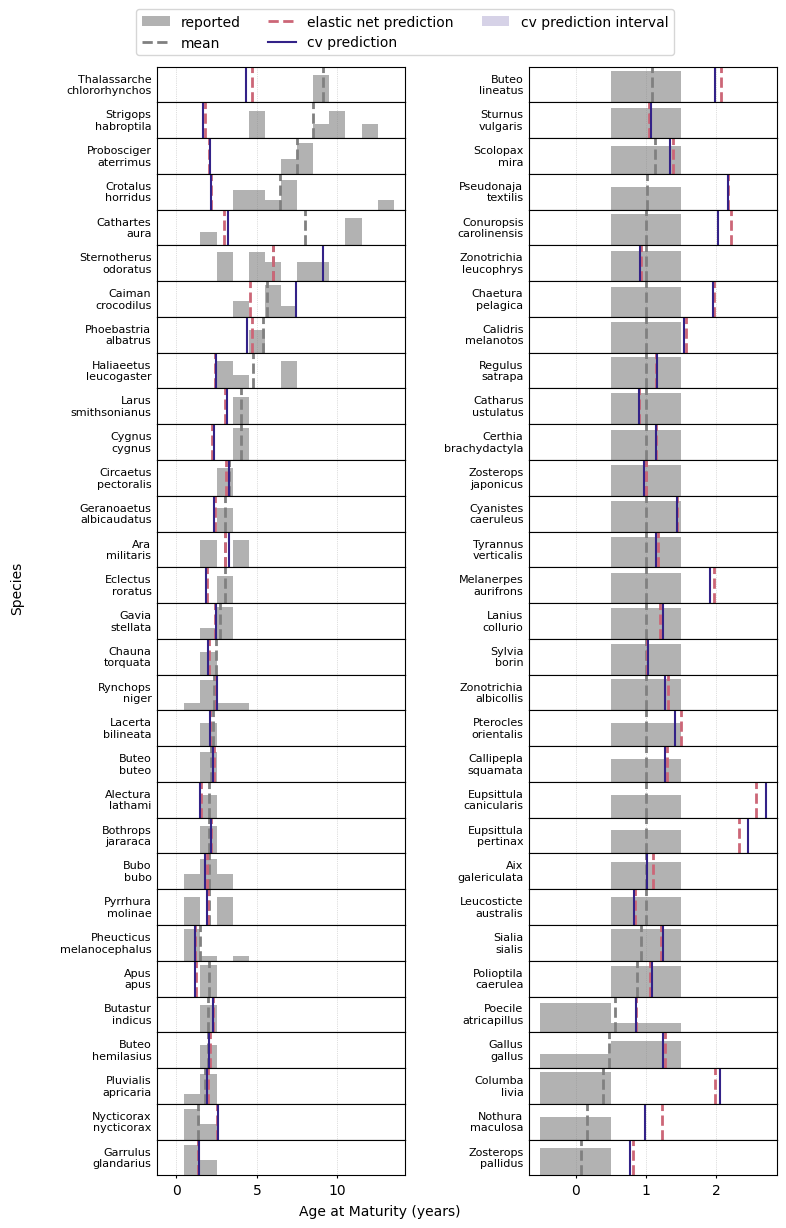

In [1]:
data_reported_filename = '00.02_age_mat_reported.csv'
config_filepath = '../config/config_reptilesgallus.yaml'
config_pred_filepath = '../config/config_pred_reptilesgallus.yaml'

import sys
sys.path.append("..")
from pathlib import Path
import pandas as pd
import life_pi.lib.generate_pi as generate_pi
import life_pi.lib.plot_utils as plot_utils
from life_pi.lib.get_config import get_config
cfg = get_config(config_filepath)
data_dir = Path('..', cfg['data_dir'])
output_dir = Path('..', cfg['output_dir'])
plot_dir = Path('../figures', output_dir.stem)
plot_dir.mkdir(parents=True, exist_ok=True)
print(f"Confidence level >> {(1-cfg['alpha'])*100}%")

# Load reported lifespan data
df_datareport = pd.read_csv(Path(data_dir, data_reported_filename))
df_datareport['mean_'+cfg['y_labelname']] = df_datareport.groupby('species')['age_mat'].transform('mean') # Add mean_age_mat
df_datareport = df_datareport.groupby('species', group_keys=True).apply(lambda x: x)

strategy = 'cv'
df_data_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=0, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_data_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=False)

## Trial 13

Load config file >> ../config/config_reptilesgallus.yaml
Confidence level >> 90.0%
PARTITION # 1
PARTITION # 2
PARTITION # 3
PARTITION # 4
PARTITION # 5
PARTITION # 6
PARTITION # 7
PARTITION # 8
PARTITION # 9
PARTITION # 10


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


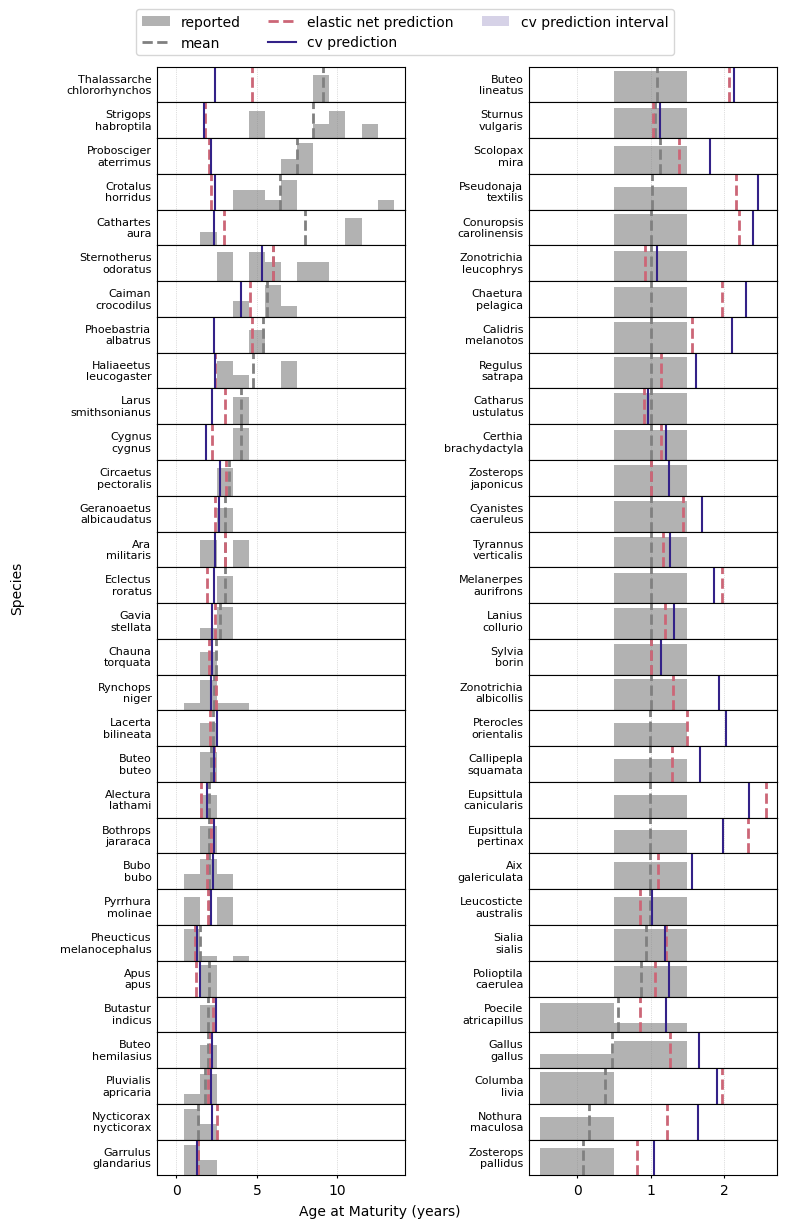

In [1]:
data_reported_filename = '00.02_age_mat_reported.csv'
config_filepath = '../config/config_reptilesgallus.yaml'
config_pred_filepath = '../config/config_pred_reptilesgallus.yaml'

import sys
sys.path.append("..")
from pathlib import Path
import pandas as pd
import life_pi.lib.generate_pi as generate_pi
import life_pi.lib.plot_utils as plot_utils
from life_pi.lib.get_config import get_config
cfg = get_config(config_filepath)
data_dir = Path('..', cfg['data_dir'])
output_dir = Path('..', cfg['output_dir'])
plot_dir = Path('../figures', output_dir.stem)
plot_dir.mkdir(parents=True, exist_ok=True)
print(f"Confidence level >> {(1-cfg['alpha'])*100}%")

# Load reported lifespan data
df_datareport = pd.read_csv(Path(data_dir, data_reported_filename))
df_datareport['mean_'+cfg['y_labelname']] = df_datareport.groupby('species')['age_mat'].transform('mean') # Add mean_age_mat
df_datareport = df_datareport.groupby('species', group_keys=True).apply(lambda x: x)

strategy = 'cv'
df_data_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=0, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_data_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=False)